# Average Sliding Window Correlation Analysis 

### This code is adapted from [Vergara et al. (2019)](https://onlinelibrary.wiley.com/doi/epdf/10.1002/hbm.24509)

#### Replicating figure 1

##### Panel A

Import necessary modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from swc_module import swc_loop

Initialize Variables

In [3]:
Hz = 0.025
nt = 120
w = 2 * np.pi * Hz
k = np.arange(nt)
TR = 1.0
theta = np.arccos(.2); # phase difference

Calculate cosine waves and normalize

In [4]:
x = np.cos(w * k * TR)
x = x / np.std(x)
y = np.cos(w * k * TR  + theta)
y = y / np.std(y)

Plot

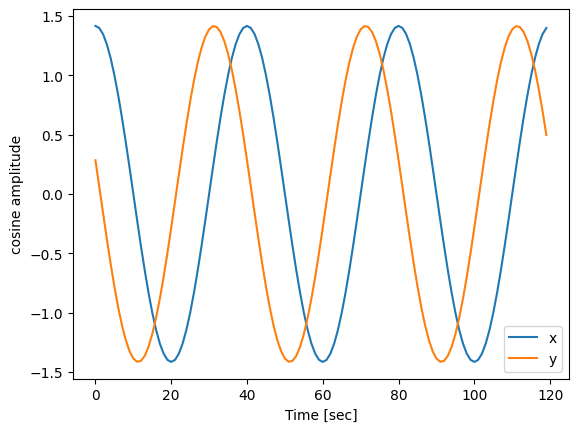

In [6]:
plt.plot(k, x, label='x')
plt.plot(k, y, label='y')
plt.legend()
plt.xlabel('Time [sec]')
plt.ylabel('cosine amplitude')

plt.show()

#### Panel B

Initialize additional variables

In [12]:
r = np.zeros((60, nt))
h = np.zeros((60, 1))

Execute `swc_loop()`

In [13]:
for delta in range(1, 61):
    r[delta-1, :], h[delta-1] = swc_loop(x.flatten(), y.flatten(), delta, TR)

h = np.tile(h, (1, nt))
z = r != 0

Plot

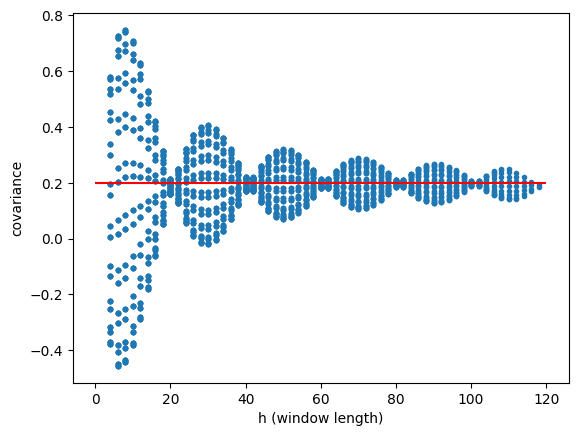

In [14]:
plt.scatter(h[z], r[z], marker='.')
plt.hlines(y=0.2, xmin=0, xmax=120, colors='red')
plt.xlabel('h (window length)')
plt.ylabel('covariance')
plt.show()